In [15]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

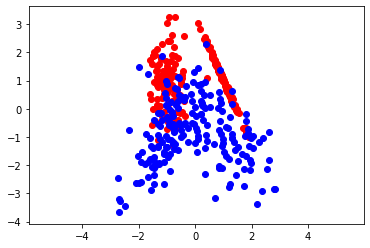

In [22]:
n = 400 
p = 2
X, Y = make_classification(n_samples=n, n_features=2,n_informative=2, n_redundant=0 )
Y=Y[:,np.newaxis]
plt.scatter(X[Y[:,0]==1, 0], X[Y[:,0]==1, 1], c="red")
plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="blue")
plt.axis("equal")
plt.show()


In [23]:
# CLASE DE LA CAPA DE LA RED
class capas_red():
    
    def __init__(self, n_conn, n_neur, act_f):

        self.act_f = act_f
        self.b = np.random.rand(1, n_neur) * 2 - 1
        self.W = np.random.rand(n_conn, n_neur) * 2 - 1

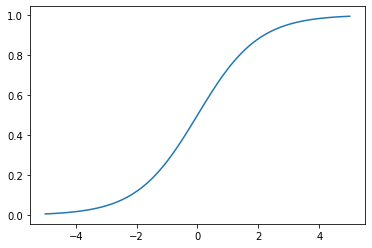

In [24]:
# FUNCIONES DE ACTIVACION

sigm = (lambda x: 1 / (1 + np.e ** (-x)),lambda x: x * (1 - x))

_x = np.linspace(-5, 5, 100)

plt.plot(_x, sigm[0](_x))

In [25]:
# CREAMOS LA RED NEURONAL

def red_neuronal(topologia, act_f):

    nn = []
    for l, capas in enumerate(topologia[:-1]):
        
        nn.append(capas_red(topologia[l], topologia[l+1], act_f))

    return nn


In [26]:
# FUNCION DE ENTRENAMIENTO
    
topologia = [p,4,6,8,1]

RED = red_neuronal(topologia, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),lambda Yp, Yr: (Yp - Yr))

def train(RED, X, Y, l2_cost, lr=0.5, train=True):   
    
    out = [(None, X)]

# Pasaje hacia adelante

    for l, capas in enumerate(RED):
              
        z = out[-1][1] @ RED[l].W + RED[l].b
        a = RED[l].act_f[0](z)
        out.append((z, a))

    if train:
        
# Pasaje hacia atras

        deltas = []

        for l in reversed(range(0, len(RED))):
            
            z = out[l+1][0]
            a = out[l+1][1]
            
            if l == len(RED)-1 :

                deltas.insert(0,l2_cost[1](a, Y) * RED[l].act_f[1](a))
            else:
                deltas.insert(0,deltas[0] @ _W.T * RED[l].act_f[1](a))

            _W = RED[l].W
            
# Decenso del gradiente

            RED[l].b = RED[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
            RED[l].W = RED[l].W - out[l][1].T @ deltas[0] * lr

    return out[-1][1]

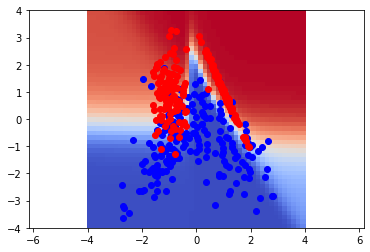

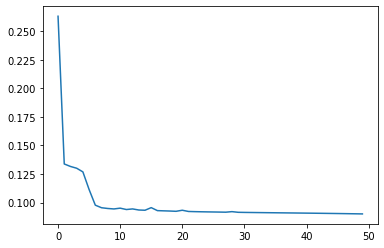

In [27]:
# VISUALIZACIÓN Y TEST

import time
from IPython.display import clear_output

RED = red_neuronal(topologia, sigm)

loss = []

for i in range(5000):
    
    # Entrenemos a la RED
    pY = train(RED, X, Y, l2_cost, lr=0.05)
    if i % 100 == 0:
        
        loss.append(l2_cost[0](pY, Y))
        res = 50
        _x0 = np.linspace(-4, 4, res)
        _x1 = np.linspace(-4, 4, res)
        _Y = np.zeros((res, res))
        for i0, x0 in enumerate(_x0):
            
            for i1, x1 in enumerate(_x1):
                
                _Y[i0, i1] = train(RED, np.array([[x1, x0]]), Y, l2_cost, train=False)[0][0]

        plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
        plt.axis("equal")
        plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="blue")
        plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="red")
        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.show()
        time.sleep(0.5)